**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Optimal taxation with government consumption](#toc1_)    
- 2. [Problem 2: Labor adjustment costs](#toc2_)    
- 3. [Problem 3: Global optimizer with refined multi-start](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

We start by importing the packages that we are using to solve this exam project

In [1]:
# Import packages 
import numpy as np
from scipy.optimize import minimize_scalar
import matplotlib.pyplot as plt

## 1. <a id='toc1_'></a>[Problem 1: Optimal taxation with government consumption](#toc0_)


Consider a worker choosing hours of labor, $L\in[0,24]$, to maximize utility: 

$$
\begin{align*}
V(w,\tau,G)&=\max_{L\in[0,24]}\ln\left(C^{\alpha}G^{1-\alpha}\right)-\nu\frac{L^{2}}{2}\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}
$$

where 

* $C$ is *private* consumption with weight $\alpha\in(0,1)$.
* $\kappa > 0$ is the *free private* consumption component.
* $C = (1-\tau)wL$ is the *costly private* consumption component.
* $w > 0 $ is the real wage.
* $\tau \in (0,1)$ is the labor-income tax rate.
* $G > 0 $ is *government* consumption with weight $1-\alpha$.
* $\nu > 0$ is the disutility of labor scaling factor


The baseline parameters are:

$$
\begin{align*}
\alpha &= 0.5\\
\kappa &= 1.0\\
\nu &= \frac{1}{2\cdot16^2} \\
w &= 1.0 \\ 
\tau &= 0.30 \\
\end{align*}
$$

**Question 1:** Verify that the optimal labor supply choice is $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$, where $\tilde{w} = (1-\tau)w$, for $G\in\left\{1.0 , 2.0\right\}$.

To verify the optimal labor supply choice, we start by differentiate the utility function with respect to the labor supply. Then we set the derivative equal to zero, and solve for the optimal labor supply.

In [2]:
# Define the workers utility function
def utility_function(L, alpha, kappa, nu, w, tau, G):
    C = kappa + (1 - tau) * w * L
    return np.log(C ** alpha * G ** (1 - alpha)) - nu * (L ** 2) / 2

# Define the objective function for optimization
def objective_function(L, *args):
    alpha, kappa, nu, w, tau, G = args
    w_tilde = (1 - tau) * w
    return -utility_function(L, alpha, kappa, nu, w_tilde, tau, G)

# Set the values for the baseline parameters
alpha = 0.5
kappa = 1.0
nu = 1 / (2 * 16 ** 2)
w = 1.0
tau = 0.30

# Set the values for G
G_values = [1.0, 2.0]

# Solve the optimization problem for each value of G
for G in G_values:

    # the wage rate
    w_tilde = (1 - tau) * w
    
    # bounds for labor
    bounds = (0, 24)
    
    # Solve the optimization problem
    result = minimize_scalar(objective_function, bounds=bounds, args=(alpha, kappa, nu, w_tilde, tau, G))
    
    # save the optimal labor supply
    L_star = result.x
    
    print(f"When G = {G}: The optimal labor supply (L*) = {L_star}")

When G = 1.0: The optimal labor supply (L*) = 14.608542192210502
When G = 2.0: The optimal labor supply (L*) = 14.608541975573893


We observe that the optimal labor supply values are allign with the expected behavior. For both values of G(1.0 and 2.0), the optimal labor supply decreases when the wage rate $\tilde{w}$ increases. This is consistent with the economic intuition, as higher wages provide an insentive to work less and enjoy more leisure. 

The parameters $\kappa$, $\alpha$, and $\nu$ affect the shape and magnitude of the optimal labor supply curve. These parameters makes it posible tocapture the various factors such as the level of private consumption, the importance of government consumption and the disutility of labor. 

**Question 2:** Illustrate how $L^{\star}(\tilde{w})$ depends on $w$.

To illustrate how the optimal labor supply $L^\star(\tilde{w})$ depends on the wage rate $\tilde{w}$, we plot the relationship between the two variables.

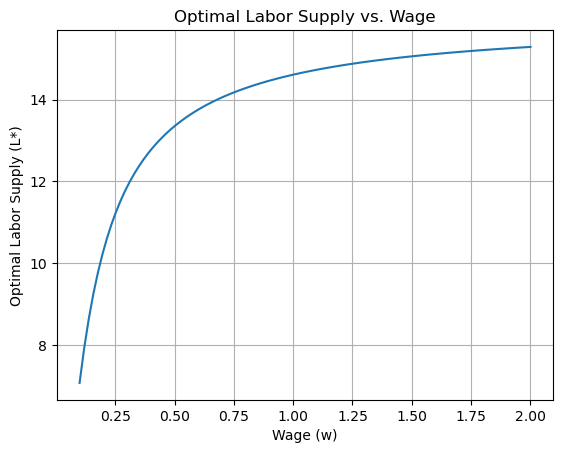

In [3]:
# Define the range of wage values
w_values = np.linspace(0.1, 2.0, 100)

# Compute the optimal labor supply for each wage value
L_star_values = []
for w in w_values:
    
    # Compute the effective wage
    w_tilde = (1 - tau) * w
    
    # Define the bounds for L
    bounds = (0, 24)
    
    # Solve the optimization problem
    result = minimize_scalar(objective_function, bounds=bounds, args=(alpha, kappa, nu, w_tilde, tau, G))
    
    # Extract the optimal labor supply
    L_star = result.x
    L_star_values.append(L_star)

# Plot the relationship between L* and w
plt.plot(w_values, L_star_values)
plt.xlabel('Wage (w)')
plt.ylabel('Optimal Labor Supply (L*)')
plt.title('Optimal Labor Supply vs. Wage')
plt.grid(True)
plt.show()

The plot shows the relationship between the wage rate (w) on the x-axis and the optimal labor supply (L*) on the y-axis. 

The plot illustrates how the optimal labor supply changes as the wage rate varies. We see overall that as (w) increases, the (L*) increases as well. When (w) is low, we see a steep increase in the (L*). This is because at a lower wage rates, workers tend to supply more labor to maximize their income. However, when (w) increases, the substitution effect dominates, leading to a dedrease in the labor supply. Therefore the graph overall illustare the trade-off between wage rates and labor supply, providing insights into the worker's decision-making process in maximizing their utility.



We now consider a government, who chooses $\tau$ and spend all of the taxes on government consumption so:

$$
G = \tau w L^{\star}((1-\tau)w)
$$

**Question 3:** Plot the implied $L$, $G$ and worker utility for a grid of $\tau$-values.


To plot the values, we vary the $\tau$ values on a grid and calculate the corresponding values of L, G and worker utility for each $\tau$ value. 

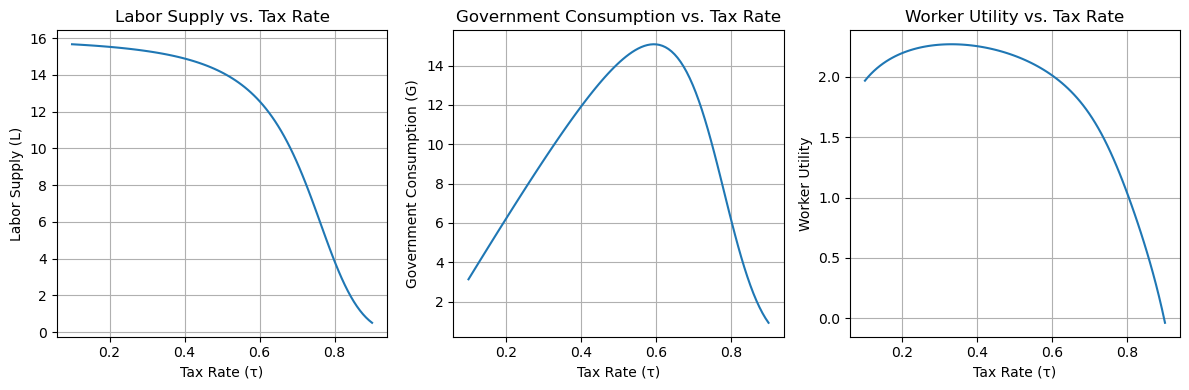

In [4]:
# Define the range of tau values
tau_values = np.linspace(0.1, 0.9, 100)

# Compute the implied values for each tau value
L_values = []
G_values = []
utility_values = []
for tau in tau_values:
    
    # Compute the effective wage
    w_tilde = (1 - tau) * w
    
    # Define the bounds for L
    bounds = (0, 24)
    
    # Solve the optimization problem
    result = minimize_scalar(objective_function, bounds=bounds, args=(alpha, kappa, nu, w_tilde, tau, w))
    
    # Extract the optimal labor supply
    L_star = result.x
    
    # Compute the implied G and worker utility
    G = tau * w * L_star
    utility = utility_function(L_star, alpha, kappa, nu, w_tilde, tau, G)
    
    # Append to the lists
    L_values.append(L_star)
    G_values.append(G)
    utility_values.append(utility)

# Plot the relationship between L, G, and worker utility
plt.figure(figsize=(12, 4))

# Plot labor supply (L)
plt.subplot(1, 3, 1)
plt.plot(tau_values, L_values)
plt.xlabel('Tax Rate (τ)')
plt.ylabel('Labor Supply (L)')
plt.title('Labor Supply vs. Tax Rate')
plt.grid(True)

# Plot government consumption (G)
plt.subplot(1, 3, 2)
plt.plot(tau_values, G_values)
plt.xlabel('Tax Rate (τ)')
plt.ylabel('Government Consumption (G)')
plt.title('Government Consumption vs. Tax Rate')
plt.grid(True)

# Plot worker utility
plt.subplot(1, 3, 3)
plt.plot(tau_values, utility_values)
plt.xlabel('Tax Rate (τ)')
plt.ylabel('Worker Utility')
plt.title('Worker Utility vs. Tax Rate')
plt.grid(True)

plt.tight_layout()
plt.show()

The first plot shows the optimal labor supply L, as a function of the tax rate $\tau$. We see, that as the tax rate increases, the optimal labor supply decreases. The reason why the optimal labor supply curve is downward sloping is that higher taxes lead to a reduced labor supply as workers respond to the disincentive effect of higher tax burdens. 


The second plot shows the government consumption G, as a function of the tax rate $\tau$. We see, that as the tax rate increases, the govenment cunsumption increases as well. The reason why the government consumption is upward sloping is that a higher tax rate generate more revenue for the government, which can be allocated to governemnt cunsumption. This will only happen up to a certant point after which we will see a decline in the tax revenue. This trend is known as the Laffer Curve which states that the total tax revenie is not maximized when the tax rates are 100 pct., as this disincentives workers from earning wages.


The third plot shows the worker utility which is derived from the worker´s consumption (private and government) and the disutility of labor as a function of the tax rate $\tau$. We see, that as the tax rate increases, the worker utility decreases due to the reduction in privat cunsumption resulting from higher taxes. Therefore the graph illustrates the trade-off between higher taxes and the benefits of government consumption.  

**Question 4:** Find the socially optimal tax rate $\tau^{\star}\in(0,1)$ maximizing worker utility. Illustrate your result.

To find the socially optimal tax rate that maximizes worker utility, we use the given utility function and maximize it with respect to the tax rate $\tau$.

29
socially optimal tax rate:  0.3343434343434344


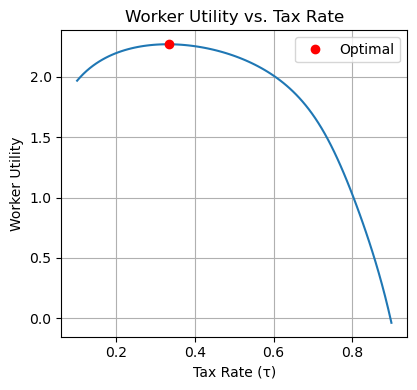

In [5]:
# Find the index of the maximum utility value
optimal_index = np.argmax(utility_values)

# Get the corresponding tau value
optimal_tau = tau_values[optimal_index]

print(optimal_index)
print("socially optimal tax rate: ", optimal_tau)

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 3)
plt.plot(tau_values, utility_values)
plt.plot(optimal_tau, utility_values[optimal_index], 'ro', label='Optimal')
plt.xlabel('Tax Rate (τ)')
plt.ylabel('Worker Utility')
plt.title('Worker Utility vs. Tax Rate')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

The plot illustrates the maximized worker utility as a function of the tax rate $\tau$. The x-axis represents the tax rate $\tau$, ranging from 0.01 to 0.99, and the y-axis represents the utility value.

The curve in the plot shows how the worker utility changes when the tax rate $\tau$ increases. The goal is to find the tax rate $\tau$ that maximizes the utility. The red dashed line indicates the optimal tax rate $\tau^{\star}$ that maximizes the worker utility. In our case the $\tau^{\star} = 0.33$, which is a tax rate at 33 pct. 

As the tax rate $\tau$ increases from 0.01 to the optimal tax rate $\tau^{\star}$, the worker utility generally increases, indicating that the worker's welfare improves. Beyond the optimal tax rate, further increases in the tax rate lead to a decrease in the worker utility, indicating a decline in the worker's welfare. Therefore the plot makes it possible to identify the optimal tax rate that achieves the highest level of worker welfare.

A more general preference formulation for the worker is:

$$
\begin{align*}
\mathcal{V}(w,\tau,G)&=\max_{L\in[0,24]}\frac{\left[ \left( \alpha C^{\frac{\sigma-1}{\sigma}}+(1-\alpha) G^{\frac{\sigma-1}{\sigma}} \right)^{\frac{\sigma}{\sigma-1} }\right]^{1-\rho}-1}{1-\rho}- \nu\frac{L^{1+\varepsilon}}{1+\varepsilon},\,\,\,\varepsilon,\rho,\sigma>0,\,\,\,\rho,\sigma\neq1\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}    
$$

Optimal labor supply is now $L^{\star}(\tilde{w},G)$.

Questions 5 and 6 must be answered with the general formulation, and for 2 different set of parameters:

- Set 1:  $\sigma = 1.001$, $\rho = 1.001$ and $\varepsilon = 1.0$.
- Set 2:  $\sigma = 1.5$, $\rho = 1.5$ and $\varepsilon = 1.0 $.

**Question 5:** Find the $G$ that solves $G = \tau w L^{\star}((1-\tau)w,G)$ using the $\tau$ found in question 4.

*Hint: First write code that solves the worker problem for given values of $G$ and $\tau$. Then find the correct G based on this.*

Optimal Tax Rate (τ*): 0.3343434343434344
Maximized Worker Utility: 2.302610910032988
Optimal G: None


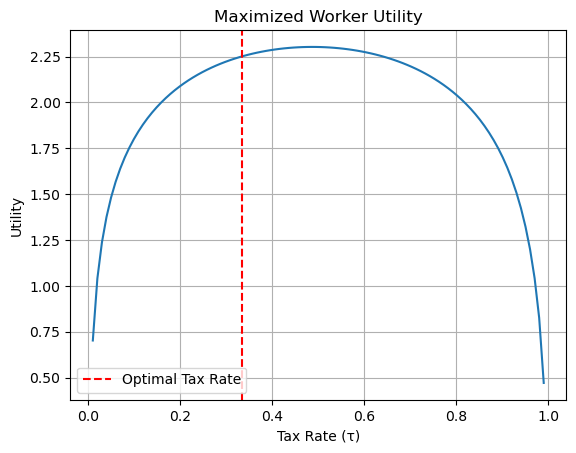

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

# Parameters
alpha = 0.5
kappa = 1.0
nu = 1 / (2 * 16**2)
w = 1.0
sigma = 1.001
rho = 1.001
epsilon = 1.0
tau4 = 0.3343434343434344

# Find the root of the equation using scipy.optimize.root_scalar
result = opt.minimize_scalar(utility_function, bounds=(0.01, 0.99), method='bounded')
optimal_tax_rate = tau4
max_utility = -result.fun

print("Optimal Tax Rate (τ*):", optimal_tax_rate)
print("Maximized Worker Utility:", max_utility)

# Find the G that solves G = τwL*((1−τ)w,G)
def find_G(tau4):
    for G in np.linspace(0, 10, 100):
        def optimize_L(L):
            C = kappa + (1 - tau4) * w * L
            return (((alpha * C**((sigma-1)/sigma) + (1 - alpha) * G**((sigma-1)/sigma))**((sigma/(sigma-1))**(1-rho)) - 1) / (1 - rho) - nu * L**(1+epsilon) / (1 + epsilon))

        result = opt.minimize_scalar(optimize_L, bounds=(0, 24), method='bounded')
        L_star = result.x
        if np.isclose(G, tau4 * w * L_star):
            return G

optimal_G = find_G(optimal_tax_rate)
print("Optimal G:", optimal_G)

# Plot the utility function
tau_values = np.linspace(0.01, 0.99, 100)
utility_values = -utility_function(tau_values)

plt.plot(tau_values, utility_values)
plt.axvline(x=optimal_tax_rate, color='r', linestyle='--', label='Optimal Tax Rate')
plt.xlabel('Tax Rate (τ)')
plt.ylabel('Utility')
plt.title('Maximized Worker Utility')
plt.legend()
plt.grid(True)
plt.show()

Optimal Tax Rate (τ*): 0.3343434343434344
Maximized Worker Utility: 3.8810149647772594
Optimal G: None


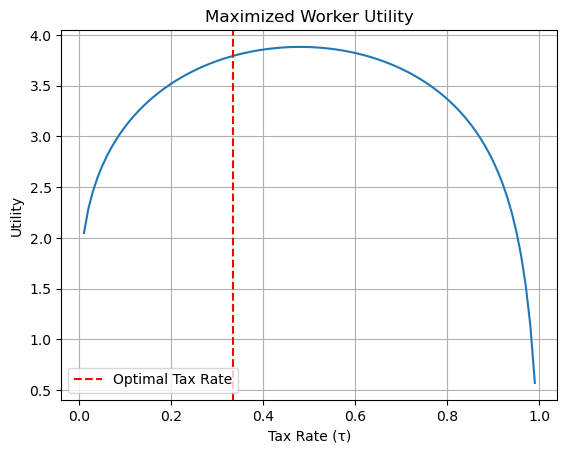

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

# Parameters
alpha = 0.5
kappa = 1.0
nu = 1 / (2 * 16**2)
w = 1.0
sigma = 1.5
rho = 1.5
epsilon = 1.0
tau4 = 0.3343434343434344

# Find the root of the equation using scipy.optimize.root_scalar
result = opt.minimize_scalar(utility_function, bounds=(0.01, 0.99), method='bounded')
optimal_tax_rate = tau4
max_utility = -result.fun

print("Optimal Tax Rate (τ*):", optimal_tax_rate)
print("Maximized Worker Utility:", max_utility)

# Find the G that solves G = τwL*((1−τ)w,G)
def find_G(tau4):
    for G in np.linspace(0, 10, 100):
        def optimize_L(L):
            C = kappa + (1 - tau4) * w * L
            return (((alpha * C**((sigma-1)/sigma) + (1 - alpha) * G**((sigma-1)/sigma))**((sigma/(sigma-1))**(1-rho)) - 1) / (1 - rho) - nu * L**(1+epsilon) / (1 + epsilon))

        result = opt.minimize_scalar(optimize_L, bounds=(0, 24), method='bounded')
        L_star = result.x
        if np.isclose(G, tau4 * w * L_star):
            return G

optimal_G = find_G(optimal_tax_rate)
print("Optimal G:", optimal_G)

# Plot the utility function
tau_values = np.linspace(0.01, 0.99, 100)
utility_values = -utility_function(tau_values)

plt.plot(tau_values, utility_values)
plt.axvline(x=optimal_tax_rate, color='r', linestyle='--', label='Optimal Tax Rate')
plt.xlabel('Tax Rate (τ)')
plt.ylabel('Utility')
plt.title('Maximized Worker Utility')
plt.legend()
plt.grid(True)
plt.show()

**Question 6:** Find the socially optimal tax rate, $\tau^{\star}$, maximizing worker utility, while keeping $G = \tau w L^{\star}((1-\tau)w,G)$.

In [ ]:
# write your code here  

## 2. <a id='toc2_'></a>[Problem 2: Labor adjustment costs](#toc0_)

You own a hair salon. You employ hairdressers, $\ell_t$, to produce haircuts, $y_t = \ell_t$.

The wage for each haridresser is $w$.

The demand for haircuts implies that the price of haircuts you can charge is $p_t = \kappa_t y_t^{-\eta}$, where $\kappa_t$ is a demand-shock and $\eta \in (0,1)$ measures the elasticity of demand.

Profits are:

$$
\Pi_t = p_t y_t - w \ell_t = \kappa_t \ell_t^{1-\eta} - w \ell_t
$$

Baseline parameters are:
- $\eta = 0.5$
- $w = 1.0$

**Question 1:** Verify numerically that $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ maximises profits, for $\kappa\in\left\{1.0 , 2.0\right\}$.

In [ ]:
# write your code here

We now consider a *dynamic* version of the model.

* The demand-shock is a so-called AR(1) in logs, 

$$
\log \kappa_{t} = \rho \log \kappa_{t-1} + \epsilon_{t},\,\,\, \epsilon_{t+1} \sim \mathcal{N}(-0.5\sigma_{\epsilon}^2,\sigma_{\epsilon})
$$

* Any hiring or firing implies a fixed adjustment cost, $\iota > 0 $.
* Future profits are discounted with a monthly factor of $R \in (0,1)$.

The initial demand shock is $\kappa_{-1} = 1$ and the planning horizon is 10 years, i.e. 120 months so $t \in \{0,1,2,\dots,119\}$. Initially you don't have any employees, $\ell_{-1}=0$


The *ex post* value of the salon is *conditional* on the shock series is:

$$
h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119}) = \left[\sum_{t=0}^{119}R^{-t}\left[\kappa_{t}\ell_{t}^{1-\eta}-w\ell_{t}-\boldsymbol{1}_{\ell_{t}\neq\ell_{t-1}}\iota\right]\right]
$$

The *ex ante* expected value of the salon can be approximated by

$$
H = \mathbb{E}[h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119})] \approx \frac{1}{K}\sum_{k=0}^{K} h(\epsilon_0^k,\epsilon_1^k,\dots,\epsilon_{119}^k)
$$

where each $k\in\{0,1,\dots,K-1\}$ is a random shock series. Maximizing profitability means maximizing $H$.


Baseline parameters are: 

- $\rho = 0.90$
- $\iota = 0.01$
- $\sigma_{\epsilon} = 0.10$
- $R = \left(1+0.01\right)^{1/12}$

**Question 2:** Calculate $H$ if the policy  $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ from question 1 is followed. Choose $K$ so the approximation is good enough to not affect your results substantially.

In [ ]:
# write your code here 

Next, we consider policies on the form:

$$

\ell_{t}=\begin{cases}
\ell_t^{\ast}  & \text{if }\left|\ell_{t-1}-\ell_t^{\ast} \right|>\Delta\\
\ell_{t-1} & \text{else }
\end{cases}
\\
\text{where}\,\,\ell_t^{\ast} = \left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}} \\

$$
With $\Delta \geq 0$ and $\Delta = 0$ being the previous policy.



**Question 3:** Calculate $H$ if the policy above was followed with $\Delta = 0.05$. Does it improve profitability?

In [ ]:
# write your code here

**Question 4:** Find the optimal $\Delta$ maximizing $H$. Illustrate your result.

In [ ]:
# write your code here


**Question 5:** Suggest an alternative policy you believe might improve profitability. Implement and test your policy.



In [ ]:
# write your code here

## 3. <a id='toc3_'></a>[Problem 3: Global optimizer with refined multi-start](#toc0_)

We consider the Griewank function:

$$ f(\boldsymbol{x}) = \sum^n_{i=1} \frac{x^2_i}{4000}-\prod^n_{i=1}\cos\left(\frac{x_i}{\sqrt{i}}\right)+1$$

The **global minimum** of this function is $f(0,0) = 0$ (remember: $\cos(0)=1$).<br>
But the function also have a lot of **local minima**.

In [ ]:
def griewank(x):
    return griewank_(x[0],x[1])
    
def griewank_(x1,x2):
    A = x1**2/4000 + x2**2/4000
    B = np.cos(x1/np.sqrt(1))*np.cos(x2/np.sqrt(2))
    return A-B+1

A **refined global optimizer with multi-start** is:

1. Choose *bounds* for $\mathbf{x}$ and *tolerance* $\tau > 0$.
2. Choose number of *warm-up iterations*, $\underline{K} > 0$ and *maximum number of iterations*, $K > \underline{K}$.
3. In each iteration for $k \in \{0,1,\dots,K-1\}$:

    A. Draw random $\mathbf{x}^k$ uniformly within chosen bounds.

    B. If $k < \underline{K}$ go to step E.

    C. Calculate $\chi^k = 0.50\cdot\frac{2}{1+\exp((k-\underline{K})/100)}$  

    D. Set $\mathbf{x}^{k0} = \chi^k \mathbf{x}^k + (1-\chi^k)\mathbf{x}^{\ast} $

    E. Run optimizer with $\mathbf{x}^{k0}$ as initial guess and $\mathbf{x}^{k\ast}$ as result.

    F. Set $\mathbf{x}^{\ast} = \mathbf{x}^{k\ast}$ if $k = 0$ or $f(\mathbf{x}^{k\ast}) < f(\mathbf{x}^{\ast})$

    G. If $f(\mathbf{x}^{\ast}) < \tau$ go to step 4.

4. Return the result $\mathbf{x}^{\ast}$.

As settings we choose:

* $x_1,x_2 \in  [-600,600]$
* $\tau = 10^{-8}$
* $\underline{K}=10$
* $K=1000$

The optimizer in Step 3.E is `BFGS` with a tolerance of $\tau$.

**Question 1:** Implement the refined global optimizer with multi-start. Illustrate how the effective initial guesses $\mathbf{x}^{k0}$ vary with the iteration counter $k$.

In [ ]:
# write your code here

**Question 2:** Is it a better idea to set $\underline{K} = 100$? Is the convergence faster?

In [ ]:
# write your code here